In [13]:
import numpy as np
data = np.load("predictions.npz")
print(data.files)

['y_train', 'y_test', 'rf_train', 'rf_test', 'xgb_rf_train', 'xgb_rf_test', 'lgbm_rf_train', 'lgbm_rf_test', 'linear_rf_train', 'linear_rf_test', 'elastic_rf_train', 'elastic_rf_test', 'xgb_train', 'xgb_test', 'lgbm_train', 'lgbm_test', 'linear_train', 'linear_test', 'elastic_train', 'elastic_test']


In [4]:
import numpy as np
data = np.load("predictions.npz")
print(data.files)

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 定义模型列表和目标变量
models = ['rf', 'xgb_rf', 'lgbm_rf', 'linear_rf', 'elastic_rf', 'xgb', 'lgbm']
targets = ['Total', 'Gold', 'Silver', 'Bronze']

# 存储结果的列表
results = []

for model in models:
    for dataset in ['train', 'test']:
        y_true = data['y_train'] if dataset == 'train' else data['y_test']
        y_pred = data[f'{model}_{dataset}']
        
        for i, target in enumerate(targets):
            rmse = np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i]))
            mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
            r2 = r2_score(y_true[:, i], y_pred[:, i])
            
            results.append({
                'Model': model,
                'Dataset': dataset,
                'Target': target,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2
            })

# 转换为DataFrame
df_metrics = pd.DataFrame(results)

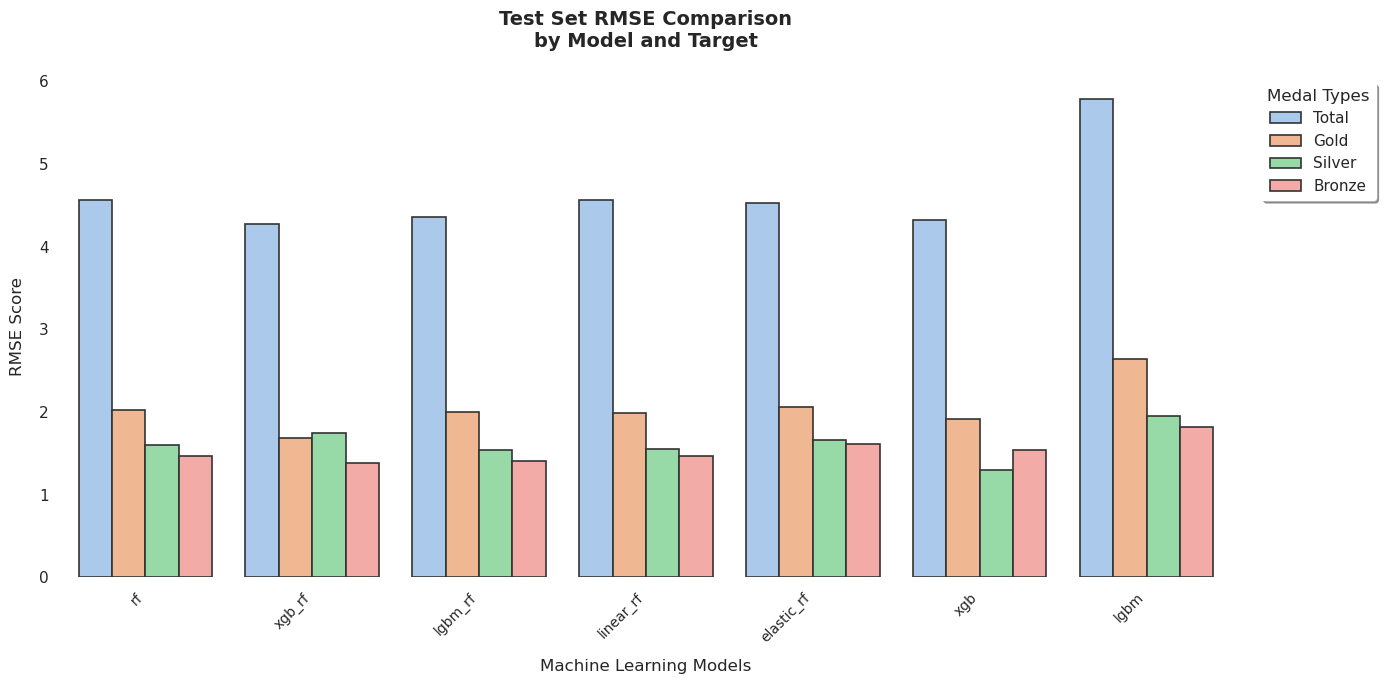

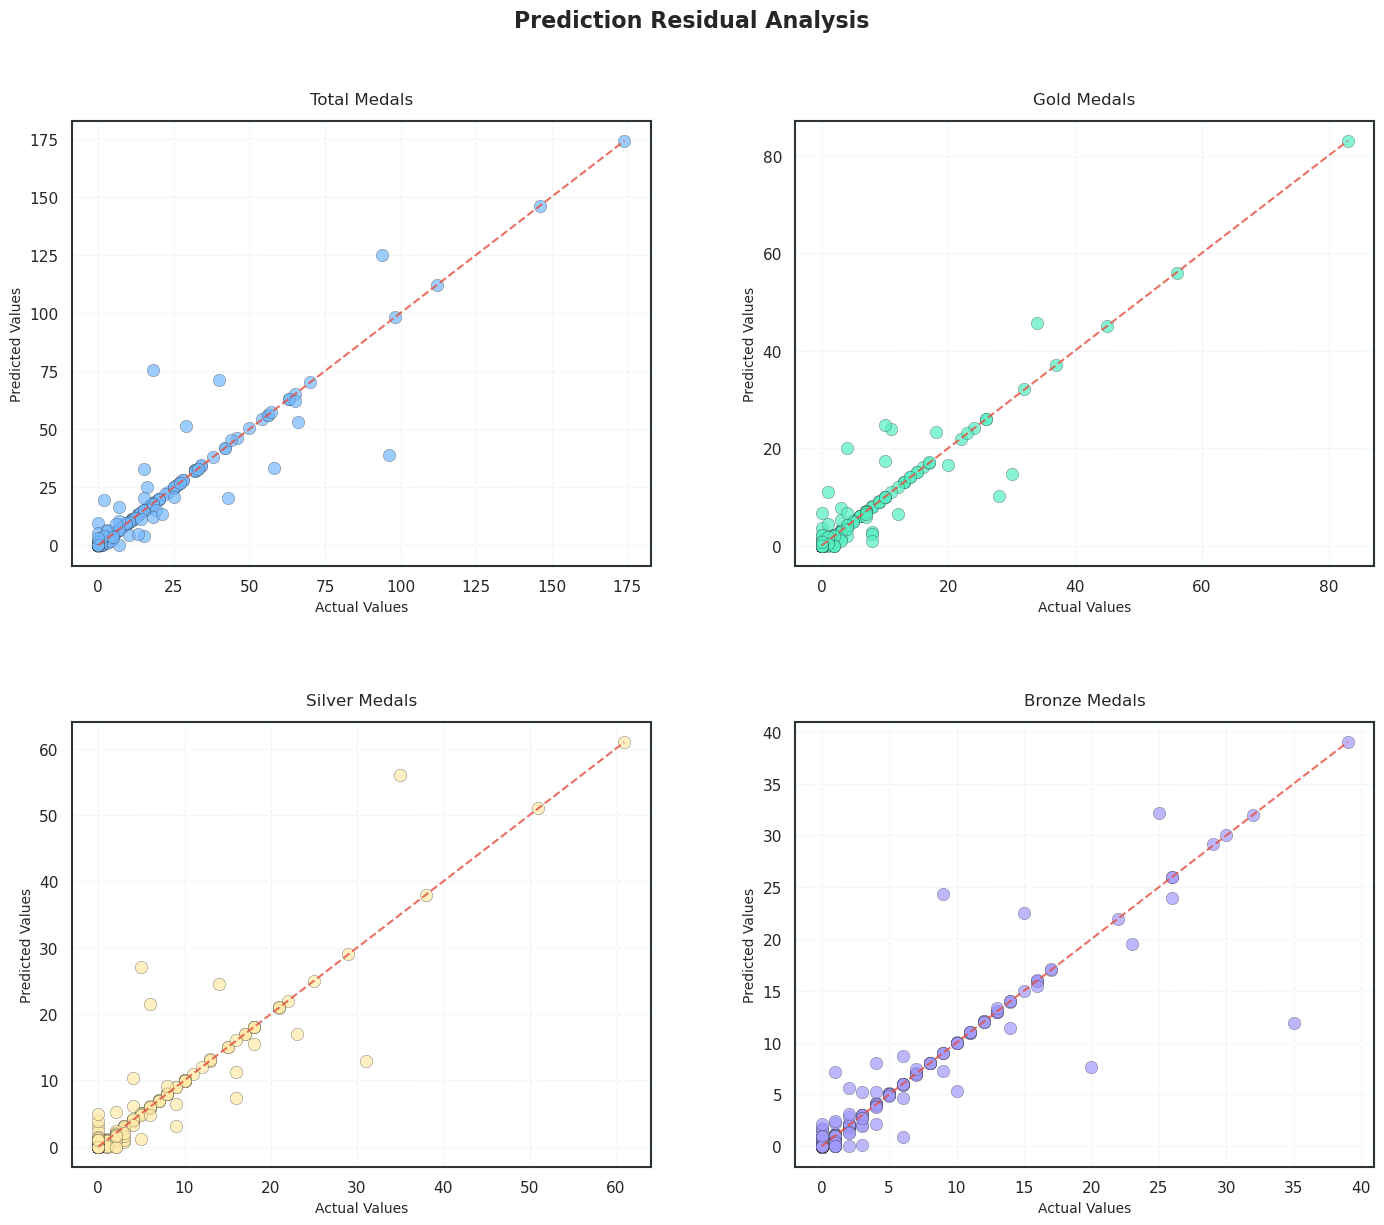

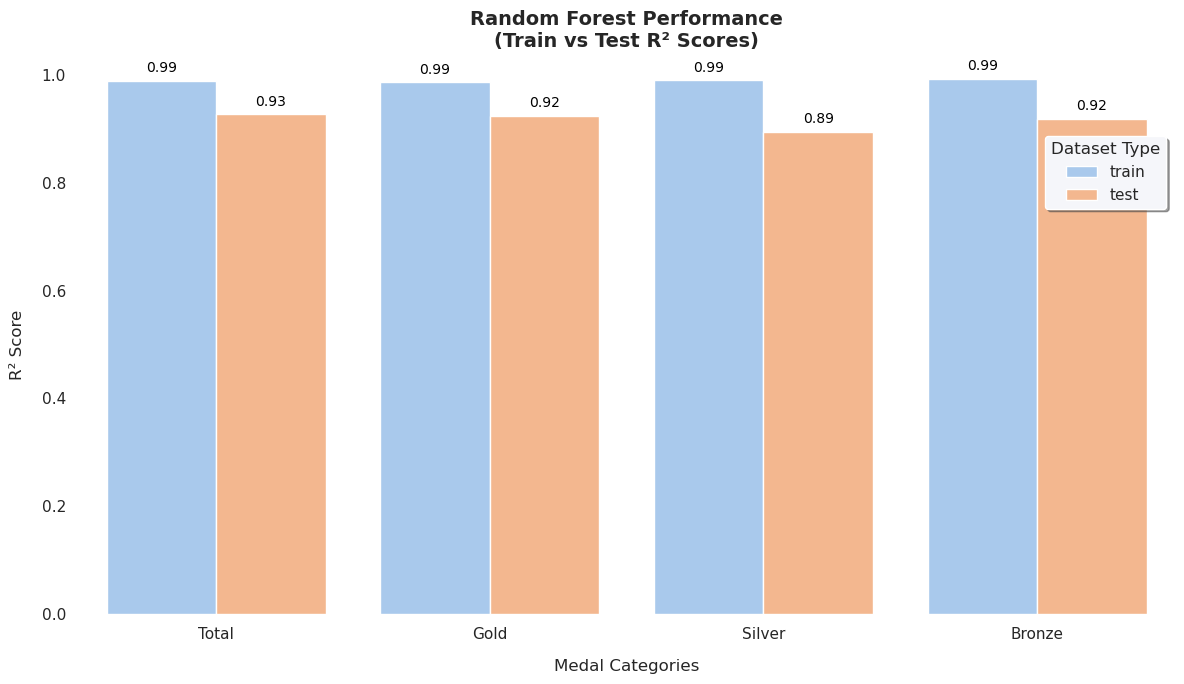

In [12]:
import numpy as np
data = np.load("predictions.npz")
print(data.files)

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 定义模型列表和目标变量
models = ['rf', 'xgb_rf', 'lgbm_rf', 'linear_rf', 'elastic_rf', 'xgb', 'lgbm']
targets = ['Total', 'Gold', 'Silver', 'Bronze']

# 存储结果的列表
results = []

for model in models:
    for dataset in ['train', 'test']:
        y_true = data['y_train'] if dataset == 'train' else data['y_test']
        y_pred = data[f'{model}_{dataset}']
        
        for i, target in enumerate(targets):
            rmse = np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i]))
            mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
            r2 = r2_score(y_true[:, i], y_pred[:, i])
            
            results.append({
                'Model': model,
                'Dataset': dataset,
                'Target': target,
                'RMSE': rmse,
                'MAE': mae,
                'R2': r2
            })

# 转换为DataFrame
df_metrics = pd.DataFrame(results)





import matplotlib.pyplot as plt
import seaborn as sns
test_metrics = df_metrics[df_metrics['Dataset'] == 'test']
# ========== 高级配色方案 ==========
PALETTE = "pastel"  # 柔和的低饱和度色系
STYLE_PARAMS = {
    "axes.edgecolor": "#2d3436",    # 深灰色边框
    "axes.linewidth": 1.5,          # 坐标轴线宽
    "grid.color": "#dfe6e9",        # 浅灰色网格线
    "font.family": "DejaVu Sans",   # 更现代的字体
    "axes.titlepad": 15             # 标题间距
}
sns.set(style="white", palette=PALETTE, rc=STYLE_PARAMS)

# ====== 1. RMSE对比图 (增强版) ======
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=test_metrics, 
    x='Model', 
    y='RMSE', 
    hue='Target',
    edgecolor=".2",    # 条形图边框颜色
    linewidth=1.2      # 条形图边框粗细
)

# 高级标注和美化
plt.title('Test Set RMSE Comparison\nby Model and Target', 
         fontsize=14, fontweight='semibold', pad=20)
plt.xlabel('Machine Learning Models', fontsize=12, labelpad=10)
plt.ylabel('RMSE Score', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)

# 专业图例设置
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, 
          title='Medal Types', 
          frameon=True,
          shadow=True,
          edgecolor='white',
          title_fontsize=12,
          bbox_to_anchor=(1.02, 1), 
          loc='upper left')

sns.despine(left=True, bottom=True)  # 移除顶部和右侧边框
plt.tight_layout()
plt.show()

# ====== 2. 残差图 (专业优化版) ======
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Prediction Residual Analysis', 
            y=1.02, 
            fontsize=16, 
            fontweight='semibold')

residual_colors = ["#74b9ff", "#55efc4", "#ffeaa7", "#a29bfe"]  # 柔和的马卡龙色系

for i, (target, color) in enumerate(zip(targets, residual_colors)):
    row, col = i // 2, i % 2
    y_true = data['y_test'][:, i]
    y_pred = data['xgb_rf_test'][:, i]
    
    # 散点图优化
    sns.scatterplot(
        x=y_true, 
        y=y_pred, 
        ax=axes[row, col],
        color=color,
        alpha=0.7,
        edgecolor=".2",  # 点边框
        linewidth=0.3,
        s=80            # 点大小
    )
    
    # 完美预测线优化
    axes[row, col].plot(
        [min(y_true), max(y_true)], 
        [min(y_true), max(y_true)], 
        color='#e74c3c',  # 深红色
        linestyle='--',
        linewidth=1.5,
        alpha=0.8
    )
    
    # 子图美化
    axes[row, col].set_title(f'{target} Medals', fontsize=12, pad=12)
    axes[row, col].set_xlabel('Actual Values', fontsize=10)
    axes[row, col].set_ylabel('Predicted Values', fontsize=10)
    
    # 添加网格
    axes[row, col].grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.35)  # 调整子图间距
plt.show()

# ====== 3. R²对比图 (专业版) ======
rf_metrics = df_metrics[df_metrics['Model'] == 'xgb_rf']
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=rf_metrics, 
    x='Target', 
    y='R2', 
    hue='Dataset',
    saturation=0.8,    # 控制颜色饱和度
    errcolor=".2",     # 误差线颜色
    errwidth=1.5       # 误差线粗细
)

# 高级标题设置
plt.title('Random Forest Performance\n(Train vs Test R² Scores)', 
         fontsize=14, 
         fontweight='semibold', 
         pad=20)

# 坐标轴优化
plt.xlabel('Medal Categories', fontsize=12, labelpad=12)
plt.ylabel('R² Score', fontsize=12, labelpad=12)
plt.ylim(0, 1)  # R²的合理范围

# 专业图例配置
ax.legend(
    title='Dataset Type',
    frameon=True,
    shadow=True,
    edgecolor='white',
    facecolor='#f5f6fa',  # 浅灰色背景
    bbox_to_anchor=(1, 0.9),
    loc='upper right'
)

# 添加数值标签
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', 
        va='center', 
        fontsize=10,
        color='black',
        xytext=(0, 9),
        textcoords='offset points'
    )

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import chardet


def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
        return result['encoding']

# 直接使用 Pandas 读取 CSV 文件
def read_csv(file_path):
    encoding = detect_encoding(file_path)
    return pd.read_csv(file_path, encoding=encoding)


data = read_csv(r"D:\Desktop\MCM\2025_MCM_C\2025_Problem_C_Data\raw\summerOly_programs.csv")
print(data.info())
print(data.isnull().sum())
print(data.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sport                  74 non-null     object 
 1   Discipline             72 non-null     object 
 2   Code                   74 non-null     object 
 3   Sports Governing Body  74 non-null     object 
 4   1896                   74 non-null     object 
 5   1900                   74 non-null     object 
 6   1904                   74 non-null     object 
 7   1906*                  74 non-null     int64  
 8   1908                   74 non-null     int64  
 9   1912                   74 non-null     object 
 10  1920                   74 non-null     int64  
 11  1924                   74 non-null     object 
 12  1928                   72 non-null     object 
 13  1932                   72 non-null     object 
 14  1936                   72 non-null     object 
 15  1948    

In [9]:
file_dict_path = r".\2025_Problem_C_Data\raw\data_dictionary.csv"
athletes_file_path = r".\2025_Problem_C_Data\raw\summerOly_athletes.csv"
hosts_file_path = r".\2025_Problem_C_Data\raw\summerOly_hosts.csv"
medals_file_path = r".\2025_Problem_C_Data\raw\summerOly_medal_counts.csv"
programs_file_path = r".\2025_Problem_C_Data\raw\summerOly_programs.csv"

# 检测文件编码
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        raw_data = f.read()
        result = chardet.detect(raw_data)
        return result['encoding']

# 直接使用 Pandas 读取 CSV 文件
def read_csv(file_path):
    encoding = detect_encoding(file_path)
    return pd.read_csv(file_path, encoding=encoding)

# 读取数据
#data_dict = read_csv(file_dict_path)
athletes = read_csv(athletes_file_path)
hosts = read_csv(hosts_file_path)
medals = read_csv(medals_file_path)
programs = read_csv(programs_file_path)

In [10]:
# 检查所有数据文件缺失值并以零填充
print(athletes.isnull().sum())
print(hosts.isnull().sum())
print(programs.isnull().sum())
print(medals.isnull().sum())

# 检查所有数据文件重复值并删

Name     0
Sex      0
Team     0
NOC      0
Year     0
City     0
Sport    0
Event    0
Medal    0
dtype: int64
Year    0
Host    0
dtype: int64
Sport                    0
Discipline               2
Code                     0
Sports Governing Body    0
1896                     0
1900                     0
1904                     0
1906*                    0
1908                     0
1912                     0
1920                     0
1924                     0
1928                     2
1932                     2
1936                     2
1948                     2
1952                     2
1956                     2
1960                     2
1964                     2
1968                     2
1972                     2
1976                     2
1980                     2
1984                     2
1988                     3
1992                     2
1996                     2
2000                     2
2004                     2
2008                     2
2012              

In [11]:
print(athletes.duplicated().sum())

print(hosts.duplicated().sum())

print(programs.duplicated().sum())

print(medals.duplicated().sum())

1466
0
0
0
